# Introduction à `PyTorch`.

## Introduction aux calculs matricielles, réseaux neuronaux, et au GPU.
PyTorch est une bibliothèque de machine learning open-source largement utilisée pour le calcul
tensoriel et la construction de réseaux neuronaux. Elle est appréciée dans le domaine de
l'apprentissage profond en raison de sa flexibilité et de sa facilité d'utilisation, en particulier
pour le calcul matriciel et la gestion efficace des GPU.

### 1. Calcul matricielle avec `PyTorch`.
Le calcul matriciel est fondamental pour les algorithmes de machine learning, car les données et
les poids des modèles sont souvent représentés sous forme de matrices. PyTorch facilite la
manipulation de ces matrices via l'objet Tensor, qui est l'équivalent générique d'un tableau
multidimensionnel.

Voici quelque opérations de base avec des tenseurs :

- Création de tenseurs, les tenseurs peuvent être créer à partir de listes, de numpy arrays, ou en initialisant des valeurs.
- Opération sur les tenseurs, vous pouvez effectuer des opérations arithmétiques, des produits de matriciels, des transpositions, etc...

### 2. Réseaux neuronnaux avec `PyTorch`.
La construction de réseaux neuronnaux se fait généralement en définissant une classe personalisé qui héride de //. Voici un exemple simple d'un réseau neuronal.

In [14]:
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

### 3. Utilisation des `GPU`.

`PyTorch` permet de tirer parti de la puissance des GPU pour accélerer le calcul. Les tenseurs et modèles, peuvent être déplacés vers le GPU en utilisant la méthode ou. Voici comment vous pouvez déplacer un tenseur et un modèle vers le GPU.

In [13]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# tensor = tensor.to(device)
# model = model.to(device)

## Conclusion.

`PyTorch` est un puissant outil pour le calcul matriciel et la construction de réseaux neuronaux, offrant une API intuitive, et la possibilité de développer, des modèles efficacement avec le soutien du calcul GPU. Grâce à sa flexibilité et ses capacités éprouvées dans le domaine de l'apprentisage profond, `PyTorch` est devenue un choix privilégier pour les chercheurs et les praticiens. La compréhension du calculs matriciel, des réseaux neuronnaux et de l'utilisation des GPU, est essentielle, pour tirer des capacité de `PyTorch` dans le dévellopement de modèles d'apprentissage automatique avancés.

## Exemple, de classification d'images.

Nous allons apprendre à utiliser `PyTorch` pour créer un modèle de classification d'images, avec le jeu de données `CIFAR-10`.

### Importation des bibliothèques nécessaires.

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt

# vérification de la version de pytorch
print(f"pytorch version -> {torch.__version__}")

pytorch version -> 1.13.1+cu117


- `torch` : La bibliothèques principal de PyTorch pour manipuler des tenseurs, et construire des modèles de machine learning.
- `torch.nn` : Fournit des modules pour construire des modèles de réseaux de neurones.
- `torch.optium` : Contient des algorithmes d'optimisations comme `SGD` et `Adam`.
- `torchvision.datatsets` : Contient des jeux de données populaires préchargés, comme `CIFAR-10` et `MNIST`.
- `torchvision.transofmrs` : Fournit des transformations pour prétraiter les données (par exemple, normalisation).
- `torch.utils.data.DataLoader` : Crée des itérateurs pour charger les données par lots.

### Chargement et prétraitement du jeu de données `CIFAR-10`.

Pour charger les données `CIFAR-10`, nous utilisons `torchvision.datasets` et appliquons des transformations comme la normalisations.

In [21]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # normalisation entre -1 et 1
])

# chargement des données d'entrainement et de test
train_dataset = datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root="./data", train=False, transform=transform, download=True)

# création des dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"taille du jeu d'entraînement : {len(train_dataset)}")
print(f"taille du jeu test : {len(test_dataset)}")

Files already downloaded and verified
Files already downloaded and verified
taille du jeu d'entraînement : 50000
taille du jeu test : 10000


- `transforms.Compose` : Combine plusieurs transformations, comme la conversion en tenseur et la normalisation.
    - `transforms.ToTensor()` : Convertit une image `PIL` ou `NumPy` en tenseur `PyTorch`.
    - `transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))` : Normalise les pixels des images dans la plage `[-1,1]`.
- `datasets.CIFAR10` : Charge le jeu de données `CIFAR-10`, qui contient 60 000 images (50 000 pour l'entraînement, et 10 000 pour le test).
- `DataLoader` : Créer un gestionnaire de données, pour parcourir les données par lots.
    - `batch_size=64` : Chaque lot contient 64 images, ce qui réduit la mémoire requise et acélérent l'entraînement.
    - `shuffle=True` : Mélange aléatoirement les données à chaque époque, ce qui aide à éviter le surapprentissage, en rendant le modèle moins dépendant, de l'ordre des données.
    
### Visualisations des données.

Affichons quelque exemples d'images, pour comprendre les données.

labels : [1 7 6 0 8 7 5 9 3 7]


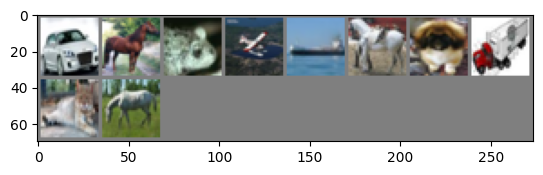

In [24]:
def imshow(img):
    img = img / 2 + 0.5 # Dénormalisations.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# affichage d'un lot d'images
examples = iter(train_loader)
example_data, example_targets = next(examples)
print(f"labels : {example_targets[:10].numpy()}")
imshow(make_grid(example_data[:10]))

- `imshow(img)`: Fontion qui dénormalise et affiche une image.
- `torchvision.utils.make_grid`: Combine plusieurs images en une grille.
- `example_data`: Un lot d'image trié au `DataLoader`.
- `example_targets`: Les labels associés aux images.

### Construction du modèle de classification.

Nous définissions un réseau neuronal convolutif (CNN) simple.

In [26]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
# instanciation du modèle
mode1 = CNN()
print(mode1)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


- `nn.Conv2D` : Couche de convolution qui applique des filtres pour extraire des caractéristiques.
    - 3 : Nombre de canaux d'entrée (image RGB).
    - 32 : Nombre de filtres (ou cartes de caractéristiques).
    - `kernel_size=3` : taille du filtre (3x3 pixels).
    - `stride=1` : Nombre de pixels entre les applications du filtres.
    - `padding=1` : Ajoute un pixel autour des images pour conserver leur taille.
- `nn.MaxPool2D` : Réduit la taille des images en prenant le maximum dans chaque région 2x2.
- `nn.Linear` : Couche dense connectant tous les neurones d'une couche aux suivants.
- `torch.rellu` : Fonction d'activation qui introduit de la non-linéartité dans le modèle.

### Définition de la fonction de perte et de l'optimiseur.

Nous utilisons la fonction de perte `CrossEntropyLoss` et l'optimiseur `Adam`.

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mode1.parameters(), lr=0.001)

- `nn.CrossEntropyLoss` : Mesure l'erreur entre les prédictions du modèle et les labels vrais.
- `optim.Adam` : Algrithme d'optimisation adaptatif.
    - `lr=0.001` : Taux d'apprentissage, qui contrôle la vitesse de mise à jour des poids.

### Entraînements du modèle.

Nous entraînons le modèle sur les données d'entraînement.

In [ ]:
n_epochs = 5
for epoch in range(n_epochs):
    print(f"\n---début de l'époque {epoch + 1}/{n_epochs}---")
    mode1.train()
    running_loss = 0.0
    
    for batch_idx, (images, labels) in enumerate(train_loader):
        # rénitialisation des gradients
        optimizer.zero_grad()
        
        # propagation avant
        outputs = mode1(images) # passe les images à travers le réseau pour produire des prédictions
        
        # vérifiez si un redimensionnement est nécessaire
        if outputs.shape[0] != labels.shape[0]:
            print(f"mismatch detected : outputs shape {outputs.shape[0]} vs labels shape {labels.shape[0]}")
            min_batch_size = min(outputs.shape[0], labels.shape[0])
            outputs = outputs[:min_batch_size]
            labels = labels[:min_batch_size]
            
        # calcul de la perte
        loss = criterion(outputs, labels)
        
        # rétropropagation et mise à jour des poids
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # affiche périodiquement l'état d'avancement
        if batch_idx % 10 == 0:
            print(f"bacth {batch_idx + 1}/{len(train_loader)}, perte : {loss.item():.4f}")
            
    print(f"---fin de l'époque {epoch + 1}/{n_epochs}, perte moyenne : {running_loss / len(train_loader):.4f} ---")


---début de l'époque 1/5---
mismatch detected : outputs shape 256 vs labels shape 64
bacth 1/782, perte : 2.2955
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 11/782, perte : 2.3312
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mi

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 141/782, perte : 2.2975
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 151/782, perte : 2.3032
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 281/782, perte : 2.2941
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 291/782, perte : 2.3029
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 421/782, perte : 2.3025
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
b

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 561/782, perte : 2.3031
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
m

bacth 691/782, perte : 2.3168
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 701/782, perte : 2.3033
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 51/782, perte : 2.3028
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 61/782, perte : 2.3023
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs sh

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 191/782, perte : 2.3051
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
m

bacth 321/782, perte : 2.3022
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 331/782, perte : 2.3037
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
bacth 461/782, perte : 2.3035
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 471/782, perte : 2.2992
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 601/782, perte : 2.3048
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 611/782, perte : 2.3009
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 741/782, perte : 2.3021
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 751/782, perte : 2.3032
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 101/782, perte : 2.3030
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
m

mismatch detected : outputs shape 256 vs labels shape 64
bacth 231/782, perte : 2.3027
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 241/782, perte : 2.3034
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 371/782, perte : 2.3017
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 381/782, perte : 2.3092
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 511/782, perte : 2.3034
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 521/782, perte : 2.3018
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 651/782, perte : 2.3037
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 661/782, perte : 2.3038
mismatch detected : outputs 

- `mode1.train()` : Met le modèle en mode antraînement (activant par exemple les couches dropout).
- `outputs = mode1(images)` : Effectue une propagation avant en passant lesnimages à travers le réseau pourproduire des prédictions.
- `optimizer.zero_grad()` : Rénitialise les gradients avant la rétropropagation.
- `loss.backward()` : Calcule les gradients des poids par rapport à la perte.
- `optimizer.step()` : Met à jour les poids en fonction des gradients calculés.

### Évaluation sur le jeu de test.

Nous évaluons les performances du modèle sur les données de test.

In [ ]:
mode1.eval()
correct = 0
total = 0
with torch.no_grad()